# 200: Exampville Simulated Data

In [1]:
import larch, numpy, pandas, os, geopandas
larch.__version__

'5.4.0'

Welcome to Exampville, the best simulated town in this here part of the internet!

Exampville is provided with Larch to illustrate the
kind of data that a transportation planner might have available when building
a travel model.  This data is almost entirely fictional.

In [2]:
import larch.exampville

## TAZ Shapefile

The shapefile that includes a map of the travel analysis zones
in Exampville is stored in a zip file.

In [3]:
larch.exampville.files.shapefile

'../../data_warehouse/exampville_taz.zip'

Geopandas can open and read this data directly with unzipping it on
disk first, by including the "zip://" protocol in front of the filename.

In [4]:
taz_shape = geopandas.read_file("zip://"+larch.exampville.files.shapefile)

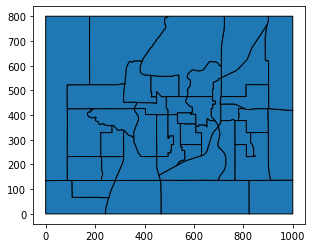

In [5]:
taz_shape.plot(edgecolor='k');

## TAZ Employment Data

In [6]:
larch.exampville.files.employment

'../../data_warehouse/exampville_employment.csv.gz'

In [7]:
emp = pandas.read_csv(larch.exampville.files.employment, index_col='TAZ')

In [8]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   NONRETAIL_EMP  40 non-null     int64
 1   RETAIL_EMP     40 non-null     int64
 2   TOTAL_EMP      40 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [9]:
emp.head()

,NONRETAIL_EMP,RETAIL_EMP,TOTAL_EMP
TAZ,,,
1,118,340,458
2,91,0,91
3,197,2,199
4,277,8,285
5,44,13,57


## Skims

The network skims for Exampville are stored in open matrix format.
Larch includes a OMX reader, which also embeds a number of handy
tools for processing OMX data into formats useful for discrete choice
analysis.

In [10]:
larch.exampville.files.skims

'../../data_warehouse/exampville_skims.omx'

In [11]:
skims = larch.OMX( larch.exampville.files.skims, mode='r' )
skims

<larch.OMX> ⋯/exampville_skims.omx
 |  shape:(40, 40)
 |  data:
 |    AUTO_COST    (float64)
 |    AUTO_DIST    (float64)
 |    AUTO_TIME    (float64)
 |    BIKE_TIME    (float64)
 |    TRANSIT_FARE (float64)
 |    TRANSIT_IVTT (float64)
 |    TRANSIT_OVTT (float64)
 |    WALK_DIST    (float64)
 |    WALK_TIME    (float64)
 |  lookup:
 |    TAZ_AREA_TYPE (40 |S3)
 |    TAZ_ID        (40 int64)

## Households

In [12]:
larch.exampville.files.hh

'../../data_warehouse/exampville_households.csv.gz'

In [13]:
hh = pandas.read_csv( larch.exampville.files.hh )

In [14]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            5000 non-null   float64
 1   Y            5000 non-null   float64
 2   INCOME       5000 non-null   float64
 3   N_VEHICLES   5000 non-null   int64  
 4   HHSIZE       5000 non-null   int64  
 5   geometry     5000 non-null   object 
 6   HOMETAZ      5000 non-null   int64  
 7   HHID         5000 non-null   int64  
 8   N_TRIPS      5000 non-null   int64  
 9   N_TRIPS_HBW  5000 non-null   int64  
 10  N_TRIPS_HBO  5000 non-null   int64  
 11  N_TRIPS_NHB  5000 non-null   int64  
 12  N_WORKERS    5000 non-null   int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 507.9+ KB


In [15]:
hh.head()

,X,Y,INCOME,N_VEHICLES,HHSIZE,geometry,HOMETAZ,HHID,N_TRIPS,N_TRIPS_HBW,N_TRIPS_HBO,N_TRIPS_NHB,N_WORKERS
0,361.35,33.34,6026.0,1,4,POINT (361.35 33.34),22,50000,15,6,8,1,3
1,272.08,30.77,30538.0,0,1,POINT (272.08 30.77),22,50001,4,1,1,2,1
2,424.18,72.55,24131.0,1,1,POINT (424.18 72.55),22,50002,6,0,4,2,0
3,464.48,61.30,34838.0,1,2,POINT (464.48 61.3),22,50003,16,3,7,6,2
4,328.95,129.36,29337.0,0,1,POINT (328.95 129.36),22,50004,0,0,0,0,0


## Persons

In [16]:
larch.exampville.files.person

'../../data_warehouse/exampville_persons.csv.gz'

In [17]:
pp = pandas.read_csv( larch.exampville.files.person )

In [18]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12349 entries, 0 to 12348
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   PERSONID       12349 non-null  int64
 1   HHID           12349 non-null  int64
 2   HHIDX          12349 non-null  int64
 3   AGE            12349 non-null  int64
 4   WORKS          12349 non-null  int64
 5   N_WORK_TOURS   12349 non-null  int64
 6   N_OTHER_TOURS  12349 non-null  int64
 7   N_TOURS        12349 non-null  int64
 8   N_TRIPS        12349 non-null  int64
 9   N_TRIPS_HBW    12349 non-null  int64
 10  N_TRIPS_HBO    12349 non-null  int64
 11  N_TRIPS_NHB    12349 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [19]:
pp.head()

,PERSONID,HHID,HHIDX,AGE,WORKS,N_WORK_TOURS,N_OTHER_TOURS,N_TOURS,N_TRIPS,N_TRIPS_HBW,N_TRIPS_HBO,N_TRIPS_NHB
0,60000,50000,0,33,1,1,0,1,2,2,0,0
1,60001,50000,0,27,1,1,1,2,4,2,2,0
2,60002,50000,0,31,1,1,1,2,5,2,2,1
3,60003,50000,0,81,0,0,2,2,4,0,4,0
4,60004,50001,1,39,1,1,0,1,4,1,1,2


## Tours

In [20]:
larch.exampville.files.tour

'../../data_warehouse/exampville_tours.csv.gz'

In [21]:
tour = pandas.read_csv( larch.exampville.files.tour )

In [22]:
tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20739 entries, 0 to 20738
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   TOURID       20739 non-null  int64
 1   HHID         20739 non-null  int64
 2   PERSONID     20739 non-null  int64
 3   DTAZ         20739 non-null  int64
 4   TOURMODE     20739 non-null  int64
 5   TOURPURP     20739 non-null  int64
 6   N_STOPS      20739 non-null  int64
 7   N_TRIPS      20739 non-null  int64
 8   N_TRIPS_HBW  20739 non-null  int64
 9   N_TRIPS_HBO  20739 non-null  int64
 10  N_TRIPS_NHB  20739 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [23]:
tour.head()

,TOURID,HHID,PERSONID,DTAZ,TOURMODE,TOURPURP,N_STOPS,N_TRIPS,N_TRIPS_HBW,N_TRIPS_HBO,N_TRIPS_NHB
0,0,50000,60000,22,1,1,0,2,2,0,0
1,1,50000,60001,4,1,1,0,2,2,0,0
2,2,50000,60001,10,2,2,0,2,0,2,0
3,3,50000,60002,20,1,1,0,2,2,0,0
4,4,50000,60002,20,1,2,1,3,0,2,1
